Text(0, 0.5, 'Y DATASET')

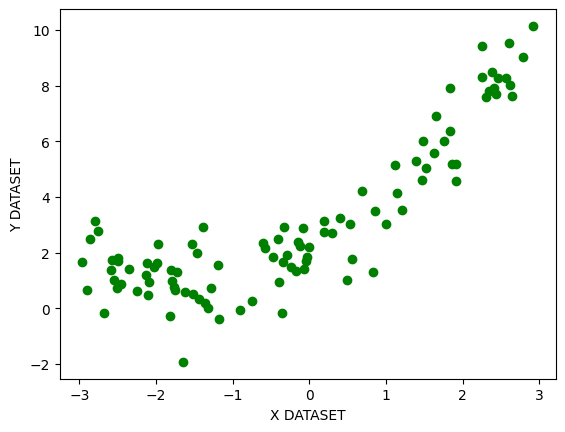

In [68]:
## Let us create dataset
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline


## TO CREATE DATASET LIKE GRADIENT, WE NEED QUADRATIC EQUATION

X = 6 * np.random.rand(100,1) - 3
Y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100,1)


## QUADRATIC EQUATION USED - 
#  Y = 0.5 * X^2 + 1.5 * X + 2 + outliers

plt.scatter(X,Y,color='g')
plt.xlabel("X DATASET")
plt.ylabel("Y DATASET")

In [69]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [22]:
x_train

array([[ 1.35117567],
       [ 1.35971299],
       [ 2.11324317],
       [-1.85339638],
       [ 0.07114057],
       [-0.76273046],
       [-2.06237383],
       [ 2.14310922],
       [ 0.51382783],
       [-1.14749224],
       [ 1.00124645],
       [-1.9132475 ],
       [ 1.43465885],
       [ 2.4794951 ],
       [ 1.54871338],
       [ 0.8090299 ],
       [-1.47051057],
       [ 0.2362226 ],
       [ 0.53950238],
       [ 1.75025626],
       [-2.02920191],
       [-1.82984767],
       [-0.12497139],
       [ 0.1663944 ],
       [ 0.39526256],
       [ 1.14850717],
       [ 1.36980638],
       [ 0.6468568 ],
       [-0.46909545],
       [-0.83544469],
       [-1.52406154],
       [ 0.22899689],
       [ 0.47630702],
       [ 1.35318706],
       [ 0.33784862],
       [ 1.46516679],
       [ 0.33811511],
       [ 2.53454151],
       [ 1.98138902],
       [-1.06025168],
       [-0.64146067],
       [ 2.89763517],
       [ 2.21261769],
       [-0.3347643 ],
       [ 1.49144828],
       [ 0

In [70]:
## Implementing Simple Linear Regression
from sklearn.linear_model import LinearRegression

l_regrsn = LinearRegression()

l_regrsn.fit(x_train,y_train)


LinearRegression()

In [71]:
from sklearn.metrics import r2_score

score = r2_score(y_test,l_regrsn.predict(x_test))

print(score)

0.6128245398090156


Text(0, 0.5, 'Y TRAINING DATA')

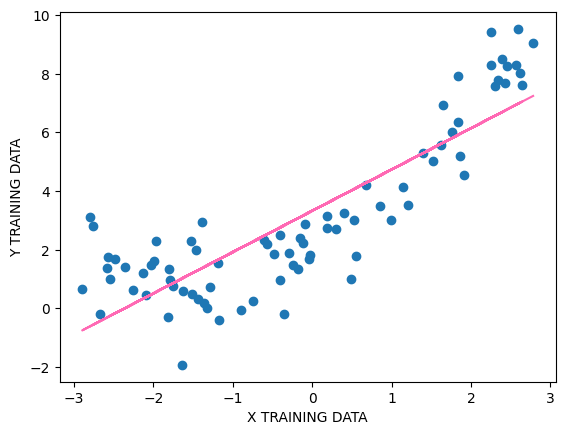

In [72]:
## Let us visualize this model
plt.plot(x_train,l_regrsn.predict(x_train),color='hotpink')
plt.scatter(x_train,y_train)
plt.xlabel("X TRAINING DATA")
plt.ylabel("Y TRAINING DATA")



In [73]:
## Let us apply POLYNOMIAL TRANSFORMATION

from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2,include_bias=True)

## include_bias is to include beta0 (x^0)

poly_x_train = poly.fit_transform(x_train)
poly_x_test = poly.transform(x_test)

In [74]:
l_regrsn = LinearRegression()
l_regrsn.fit(poly_x_train, y_train)
y_pred = l_regrsn.predict(poly_x_test)
score = r2_score(y_test,y_pred)
print(score)

0.9070219337856016


In [75]:
print(l_regrsn.coef_)

[[0.         1.41625415 0.45491839]]


In [76]:
print(l_regrsn.intercept_)

[1.99487787]


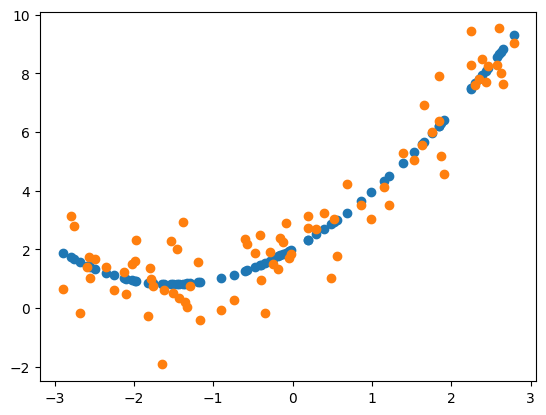

In [96]:
plt.scatter(x_train,l_regrsn.predict(poly_x_train))
plt.scatter(x_train,y_train)

In [79]:
## Let us apply POLYNOMIAL TRANSFORMATION with degree = 3

from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=3,include_bias=True)

## include_bias is to include beta0 (x^0)

poly_x_train = poly.fit_transform(x_train)
poly_x_test = poly.transform(x_test)

In [80]:
poly_x_train

array([[ 1.00000000e+00, -2.79625740e+00,  7.81905543e+00,
        -2.18640916e+01],
       [ 1.00000000e+00, -1.46207099e+00,  2.13765159e+00,
        -3.12539838e+00],
       [ 1.00000000e+00, -2.89756177e+00,  8.39586423e+00,
        -2.43275353e+01],
       [ 1.00000000e+00,  2.59848783e+00,  6.75213903e+00,
         1.75453511e+01],
       [ 1.00000000e+00, -1.97273464e+00,  3.89168196e+00,
        -7.67725582e+00],
       [ 1.00000000e+00,  5.57391117e-01,  3.10684858e-01,
         1.73172980e-01],
       [ 1.00000000e+00, -1.18925593e+00,  1.41432966e+00,
        -1.68199993e+00],
       [ 1.00000000e+00, -2.09740360e+00,  4.39910188e+00,
        -9.22669213e+00],
       [ 1.00000000e+00, -2.25260935e+00,  5.07424890e+00,
        -1.14303005e+01],
       [ 1.00000000e+00, -2.55057036e-02,  6.50540914e-04,
        -1.65925037e-05],
       [ 1.00000000e+00,  1.62484016e+00,  2.64010554e+00,
         4.28974950e+00],
       [ 1.00000000e+00, -2.35718777e+00,  5.55633420e+00,
      

In [81]:
l_regrsn = LinearRegression()
l_regrsn.fit(poly_x_train, y_train)
y_pred = l_regrsn.predict(poly_x_test)
score = r2_score(y_test,y_pred)
print(score)

0.9040724746751563


In [82]:
### Prediction of new dataset

x_new = np.linspace(-3,3,200).reshape(200,1)
poly_x_new = poly.transform(x_new)

poly_x_new

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

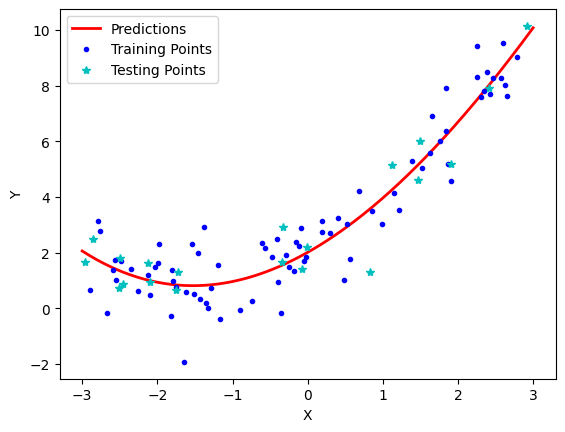

In [101]:
y_new = l_regrsn.predict(poly_x_new)

plt.plot(x_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.", label="Training Points")
plt.plot(x_test, y_test, "c*", label="Testing Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [110]:
from sklearn.pipeline import Pipeline

def poly_regression(degree):
    x_new=np.linspace(-3,3,200).reshape(200,1)
    poly_feats=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_feats),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(x_train,y_train)
    y_pred_new=poly_regression.predict(x_new)
    ## Plotting new prediction line
    plt.plot(x_new,y_pred_new,'r',label="Degree " + str(degree),linewidth=3)
    plt.plot(x_train,y_train,'b.',linewidth=3)
    plt.plot(x_test,y_test,'c.',linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X Data")
    plt.ylabel("Y Data")
    plt.axis([-4,4,0,10])
    plt.show()

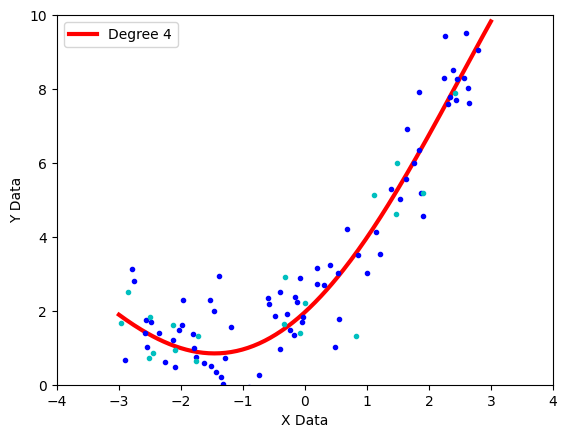

In [111]:
##  Normalfitting
poly_regression(4)

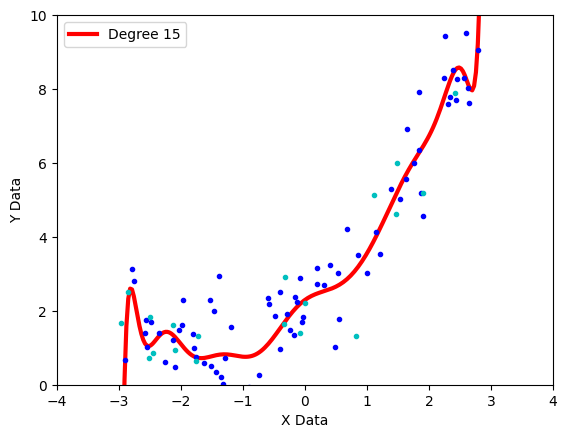

In [112]:
## Overfitting
poly_regression(15)